
# Sistemas Lineales (Clase)
## Trabajo realizado bajo el proyecto Macti: Modelación Computacional y Enseñanza
- Autor: Miguel Angel Pérez León

## Introducción

Los métodos iterativos son aquellos que nos ayudan resolver diversos problemas matemáticos, por ejemplo podemos obtener una aproximación a la solución de un sistema de ecuaciones. Se puede decir que progresivamente va calculando aproximaciones a la solución de un problema. El procedimiento se repite sobre las nuevas aproximaciones para mejorar la solución aproximada hasta que el resultado más reciente satisfaga ciertos requisitos.

A diferencia de los métodos directos, en los cuales se debe terminar el proceso para tener la respuesta y suelen tener inconvenientes en aplicaciones de sistemas de grandes dimensiones, en los métodos iterativos se puede suspender el proceso al termino de una iteración.

Hay que destacar que este tipo de métodos crea una sucesión de puntos que van a converger a la sucesión de puntos solución.


Podemos generalizar un método iterativo en los siguientes pasos:

* Inicia con una solución aproximada (semilla).
* Ejecuta una serie de cálculos para obtener o construir una mejor aproximación partiendo de la semilla. 
* Se repite el paso anterior pero usando como semilla la aproximación obtenida.

Consideraremos los sistemas lineales ya conocidos:

Sea un sistema de ecuaciones lineales

\begin{align}
a_{11}x_1 + ... + a_{1n}x_n &= b_1\\
a_{21}x_2 + ... + a_{2n}x_n &= b_2\\
a_{31}x_3 + ... + a_{3n}x_n &= b_3\\
...\\
a_{n1}x_1 + ... + a_{nn}x_n &= b_n
\end{align}

Este tipo de sistemas de ecuaciones aparecen en muchas aplicaciones cotidianas como procesamiento de señales, simulación, analísis y procesamiento de datos espaciales.



# Cruce de rectas

Considere las siguientes dos ecuaciones:

$
\begin{matrix}
a_{00} x_0 + a_{01} x_1 & = &b_0 \\
a_{01} x_0 + a_{11} x_1 & = &b_1
\end{matrix}
$

Estas ecuaciones representan dos líneas rectas en el plano Cartesiano. En forma matricial se escriben como:

$
\left[
\begin{array}{cccc}
a_{00} & a_{01} \\
a_{01} & a_{11}
\end{array} \right] 
\left[
\begin{array}{cccc}
x_{0} \\
x_{1}
\end{array} \right] 
=
\left[
\begin{array}{c}
b_0 \\ b_1
\end{array}
\right]
$

Para encontrar el punto de cruce de las dos rectas debemos resolver el sistema de ecuaciones.

## Ejemplo 1: 
$
\begin{array}{ccc}
3x_0 + 2x_1 & = &2 \\
2x_0 + 6x_1 & = &-8
\end{array} \Longrightarrow
\left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array} \right]
\left[
\begin{array}{cccc}
x_{0} \\
x_{1}
\end{array} \right] 
=
\left[
\begin{array}{c}
2\\ -8
\end{array}
\right]
$

Las ecuaciones se pueden escribir como:

$
\begin{array}{ccc}
\dfrac{3}{2}x_0 + x_1 & = & \dfrac{2}{2} \\
\dfrac{2}{6}x_0 + x_1 & = & -\dfrac{8}{6}
\end{array} \Longrightarrow
\begin{array}{ccc}
y_0 = m_0 x + b_0 \\
y_1 = m_1 x + b_1
\end{array} \text{ donde }
\begin{array}{ccc}
m_0 = -\dfrac{3}{2} & b_0 = 1 \\
m_1 = -\dfrac{2}{6} & b_1 = -\dfrac{8}{6}
\end{array}
$

In [3]:
%run "init.ipynb"
# Importación de las bibliotecas numpy y matplotlib
import numpy as np
import matplotlib.pyplot as plt
import macti_lib.visual

**Solución del sistema lineal**

In [4]:
A = np.matrix([[3, 2],[2,6]] )
b = np.array([2,-8])
print("Matriz A : \n",A)
print("Vector b : \n", b)
sol = np.linalg.solve(A,b)
print("Solución del sistema : \n", sol)

Matriz A : 
 [[3 2]
 [2 6]]
Vector b : 
 [ 2 -8]
Solución del sistema : 
 [ 2. -2.]


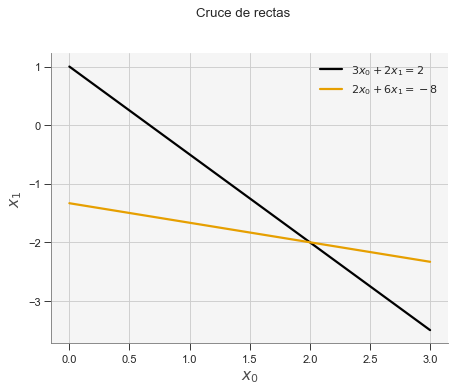

In [5]:
# Parámetros de las rectas
m0 = -3/2
b0 = 1
m1 = -2/6
b1 = -8/6

# Ecuciones de las rectas
x = np.linspace(0,3,10)
y0 = m0 * x + b0
y1 = m1 * x + b1

#Gráficas
plt.plot(x,y0,label = '$3x_0+2x_1=2$')
plt.plot(x,y1,label = '$2x_0+6x_1=-8$')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.suptitle('Cruce de rectas', y=1)
#plt.grid(c='b')
plt.legend()

**Gráfica de la solución**

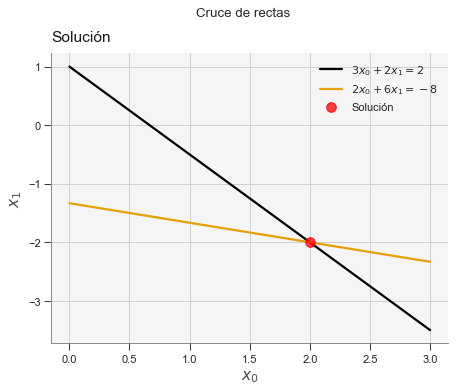

In [6]:
plt.plot(x,y0,label = '$3x_0+2x_1=2$')
plt.plot(x,y1,label = '$2x_0+6x_1=-8$')
plt.scatter(sol[0], sol[1], c='red', s = 75, alpha=0.75, zorder=5, label='Solución')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.suptitle('Cruce de rectas', y=1)
plt.title('Solución')
plt.legend()

# Método de Jacobi

Enlistaremos los pasos a seguir para resolver un sistema de ecuaciones por el método de Jacobi.

* Despejar de cada ecuación una incognita.
* Sustituir la semilla en las ecuaciones para obtener la aproximación a cada punto.
* La aproximación obtenida será la nueva semilla.
* Repetir el proceso hasta el punto de paro.

De manera matricial vemos el método de Jacobi como:

$$M=D$$ 
$$N=-(L+U)$$

Donde $D$ es la matriz diagonal de la matriz asociada al sistema de ecuaciones.

$L$ es la matriz tal que $l_{ij}=a_{ij}$ si $i<j$ y $l_{ij}=0$ en caso contrario.

$U$ es la matriz tal que $u_{ij}=a_{ij}$ si $i>j$ y $u_{ij}=0$ en caso contrario.

Con lo cual 
$$A=D+L+U = M-N$$ y el sistema 
$$Mx =Nx +b$$
es equivalente a resolver 
$$Dx = -(L+U)x +b$$
Así, la sucesión se construye partiendo de un valor inicial $x_0$ y definiendo
$$ Dx_{k+1} = -(L+U)x_k +b$$

para $k\geq0$

## Algoritmo

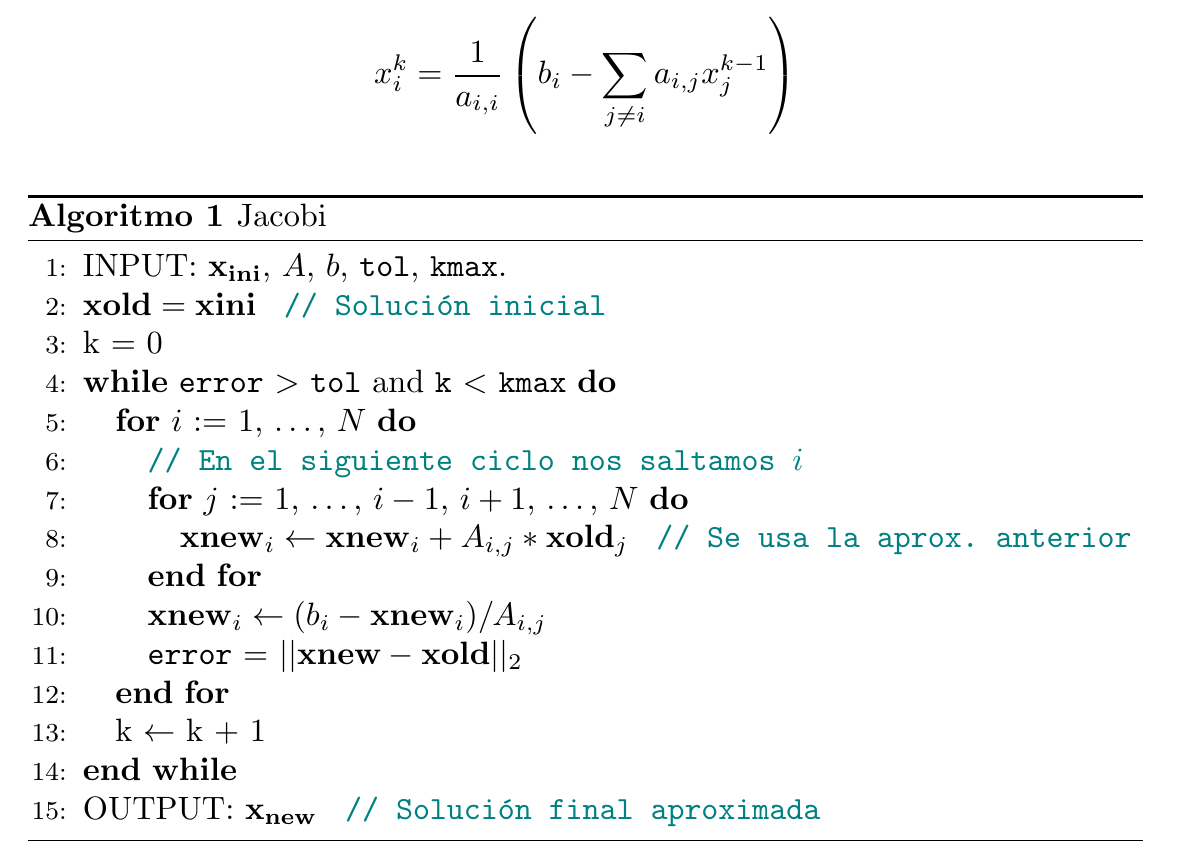

### Ejemplo 1
Consideremos el siguiente sistema de ecuaciones:

\begin{align}
2x -y &= 9\\
x +6y -2z &= 15\\
4x -3y +8z &= 1\\
\end{align}

Despejamos las incognitas de las ecuaciones:
\begin{align}
x  &= (9 +y_0 )/2\\
y  &= (15 -x_0 +2z_0)/6\\
z &= (1-4x_0+3y_0)/8\\
\end{align}


Teniendo el punto inicial $v_0 = (x_0, y_0, z_0)$.
Suponiendo que el punto inicial sea $v_0 = (0,0,0)$ sustituimos y calculamos el siguiente punto.

\begin{align}
x  &= (9 +0 )/2\\
y  &= (15 -0 +2(0))/6\\
z &= (1-4(0)+3(0))/8\\
\end{align}

Obtenemos
$$v_1 = (4.5,2.5,0.125)$$

Continuamos a la siguiente iteración usando $v_1$ como semilla.

\begin{align}
x  &= (9 + (2.5)/2\\
y  &= (15 -4.5 +2(0.125))/6\\
z &= (1-4(4.5)+3(2.5))/8\\
\end{align}

Y obtenemos el punto:
$$v_2 = (5.75,1.7916,-1.1875)$$

Se realiza el procedimiento recursivamente hasta parar en alguna iteración.

En este caso las aproximaciones convergen en el punto $(5,1,-2)$



### Programación del método

La siguiente celda de código sirve para generar la grafica de las soluciones.

In [7]:
def grafica(x, y0, y1, xini, sol, titulo):
    plt.plot(x,y0,label = '$3x_0+2x_1=2$')
    plt.plot(x,y1,label = '$2x_0+6x_1=-8$')
    plt.scatter(xini[0][0], xini[1][0], c='yellow', s=75, alpha=0.95, zorder=5, label='Inicio')
    plt.scatter(sol[0], sol[1], c='red', s=75, alpha=0.75, zorder=5, label='Solución')
    plt.plot(xini[0], xini[1], 'k.--', lw=1.0, zorder=6, label='Aproximación')
    plt.xlabel('$x_0$')
    plt.ylabel('$x_1$')
    plt.suptitle('Cruce de rectas', y=1)
    plt.title(titulo, color='blue')
    plt.grid(color='white')
    plt.legend()

### Jacobi

En la celda siguiente se muestra el código del método de Jacobi

In [8]:
def jacobi(A,b,tol,kmax,xini):
    N = len(b)
    xnew = np.zeros(N)
    xold = np.zeros(N)
    
    # Solución inicial
    xold[0] = xini[0][0]
    xold[1] = xini[1][0]
    
    error = 10
    k = 0
    print('{:^2} {:^10} {:^12} {:^12}'.format(' i ', 'Error', 'x0', 'x1'))
    while(error > tol and k < kmax) :
        for i in range(0,N): # se puede hacer en paralelo
            xnew[i] = 0
            for j in range(0,i):
                xnew[i] += A[i,j] * xold[j]
            for j in range(i+1,N):
                xnew[i] += A[i,j] * xold[j]                
            xnew[i] = (b[i] - xnew[i]) / A[i,i]
        
        # Almacenamos la solución actual
        xini[0].append(xnew[0])
        xini[1].append(xnew[1])
        
        error = np.linalg.norm(xnew-xold,1)
        k += 1
        xold[:] = xnew[:]
        print('{:2d} {:10.9f} ({:10.9f}, {:10.9f})'.format(k, error, xnew[0], xnew[1]))
    return xnew, error, k

# Ejercicio 1

Haciendo uso de la función `jacobi` definida en la celda superior, usala para aproximar la solución del sistema de ecuaciones del ejemplo 1.

Revisa la definición de la función `jacobi` para saber que parámetros recibe y que valores devuelve, incluso si ya ejecutaste las celdas de código previas, puedes usar algunos de los parámetros definidos previamente como la matriz $A$ y el vector $\vec{b}$.

Utiliza una tolerancia de $1e^{-5}$ y $100$ iteraciones.

Guarda la solución aproximada que devuelve la función `jacobi` en una variable llamada `solucion` para validar el resultado.

In [11]:
### BEGIN SOLUTION
xini = [[0],[0]]
solucion, e, it = jacobi(A, b, 1e-5, 100, xini)
### END SOLUTION

 i    Error         x0           x1     
 1 2.000000000 (0.666666667, -1.333333333)
 2 1.111111111 (1.555555556, -1.555555556)
 3 0.444444444 (1.703703704, -1.851851852)
 4 0.246913580 (1.901234568, -1.901234568)
 5 0.098765432 (1.934156379, -1.967078189)
 6 0.054869684 (1.978052126, -1.978052126)
 7 0.021947874 (1.985368084, -1.992684042)
 8 0.012193263 (1.995122695, -1.995122695)
 9 0.004877305 (1.996748463, -1.998374232)
10 0.002709614 (1.998916154, -1.998916154)
11 0.001083846 (1.999277436, -1.999638718)
12 0.000602136 (1.999759145, -1.999759145)
13 0.000240855 (1.999839430, -1.999919715)
14 0.000133808 (1.999946477, -1.999946477)
15 0.000053523 (1.999964318, -1.999982159)
16 0.000029735 (1.999988106, -1.999988106)
17 0.000011894 (1.999992071, -1.999996035)
18 0.000006608 (1.999997357, -1.999997357)


In [ ]:
#Verificando el resultado obtenido
verifica((solucion[0],solucion[1]), (1.999997356877013, -1.9999973568770135))

Una vez que la celda superior se ejecute de manera correcta (que pase la prueba), ejecuta la siguiente celda de
código para que veas la grafica correspondiente a la aproximación de la solución de este sistema usando el método
iterativo de Jacobi.

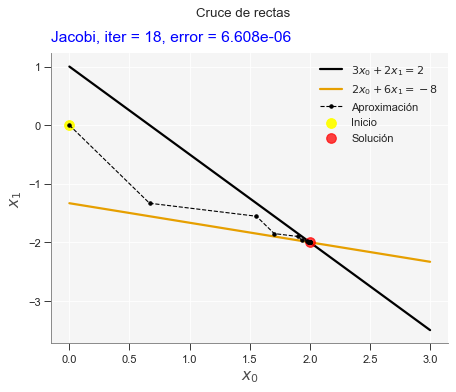

In [12]:
grafica(x, y0, y1, xini, solucion, 'Jacobi, iter = {}, error = {:4.3e}'.format(it, e) )

# Método Gauss-Seidel

Enlistaremos los pasos a seguir para resolver un sistema de ecuaciones por el método de Gauss-Seidel .

* Despejar de cada ecuación una incognita.
* Sustituir la semilla en la primera ecuación y se actualiza el valor obtenido en la semilla para sustituir en la siguiente ecuación y asi recursivamente.
* La aproximación obtenida será la nueva semilla para la siguiente iteración.
* Repetir el proceso hasta el punto de paro.

De manera matricial vemos el método de Jacobi como:

$$M=D+L$$ 
$$N=-U$$

Donde $D$ es la matriz diagonal de la matriz asociada al sistema de ecuaciones.

$L$ es la matriz tal que $l_{ij}=a_{ij}$ si $i<j$ y $l_{ij}=0$ en caso contrario.

$U$ es la matriz tal que $u_{ij}=a_{ij}$ si $i>j$ y $u_{ij}=0$ en caso contrario.

Con lo cual 
$$Mx =Nx +b$$
es equivalente a resolver 
$$(D+L)x = -Ux +b$$
Así, la sucesión se construye partiendo de un valor inicial $x_0$ y definiendo
$$ (D+L)x_{k+1} = -Ux_k +b$$

para $k\geq0$


## Algoritmo

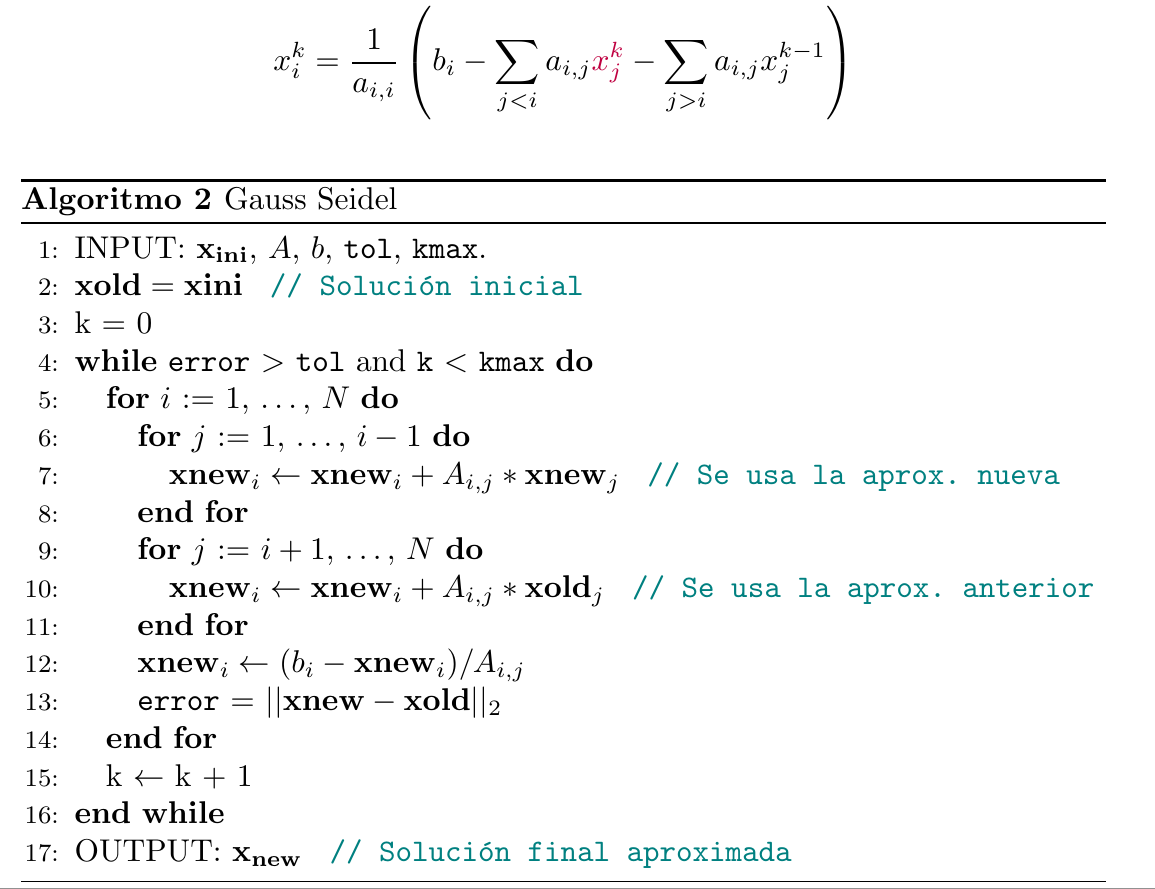

### Ejemplo 2
Consideremos el mismo sistema de ecuaciones:

\begin{align}
2x -y &= 9\\
x +6y -2z &= 15\\
4x -3y +8z &= 1\\
\end{align}

Despejamos las incognitas de las ecuaciones:
\begin{align}
x  &= (9 +y_0 )/2\\
y  &= (15 -x_0 +2z_0)/6\\
z &= (1-4x_0+3y_0)/8\\
\end{align}


Teniendo el punto inicial $v_0 = (x_0, y_0, z_0)$.
Suponiendo que el punto inicial sea $v_0 = (0,0,0)$ sustituimos y calculamos el siguiente punto:

\begin{align}
x  &= (9 +0 )/2 = 4.5\\
y  &= (15 -4.5 +2(0))/6 = 1.75\\
z &= (1-4(4.5)+3(1.75))/8 = -1.46\\
\end{align}

Obtenemos
$$v_1 = (4.5,1.75,-1.46)$$

Continuamos a la siguiente iteración usando $v_1$ como semilla.

\begin{align}
x  &= (9 + (4.5)/2 = 5.375\\
y  &= (15 -5.375 +2(-1.46))/6 = 1.11\\
z &= (1-4(5.375)+3(1.11))/8 = -2.14\\
\end{align}

Y obtenermos el punto:
$$v_2 = (5.375,1.11,-2.14)$$

Se realiza el procedimiento recursivamente hasta parar en alguna iteración.

En este caso las aproximaciones convergen en el punto $(5,1,-2)$ más rápido que con el método de Jacobi.


### Programación del método

## Gauss-Seidel

A continuación se muestra el código para el método iterativo de Gauss-Seidel

In [13]:
def gauss_seidel(A,b,tol,kmax,xini):
    N = len(b)
    xnew = np.zeros(N)
    xold = np.zeros(N)
    
    # Solución inicial
    xold[0] = xini[0][0]
    xold[1] = xini[1][0]
    
    error = 10
    k = 0
    print('{:^2} {:^10} {:^12} {:^12}'.format(' i ', 'Error', 'x0', 'x1'))
    while(error > tol and k < kmax) :
        for i in range(0,N): # se puede hacer en paralelo
            xnew[i] = 0
            for j in range(0,i):
                xnew[i] += A[i,j] * xnew[j]
            for j in range(i+1,N):
                xnew[i] += A[i,j] * xold[j]                
            xnew[i] = (b[i] - xnew[i]) / A[i,i]
            
        # Almacenamos la solución actual
        xini[0].append(xnew[0])
        xini[1].append(xnew[1])
        
        error = np.linalg.norm(xnew-xold)
        k += 1
        xold[:] = xnew[:]
        print('{:2d} {:10.9f} ({:10.9f}, {:10.9f})'.format(k, error, xnew[0], xnew[1]))
    return xnew, error, k

# Ejercicio 2

Haciendo uso de la función `gauss_seidel` definida en la celda superior, usala para aproximar la solución del sistema de ecuaciones del ejemplo 1.

Revisa la definición de la función `gauss_seidel` para saber que parámetros recibe y que valores devuelve, incluso si ya ejecutaste las celdas de código previas, puedes usar algunos de los parámetros definidos previamente como la matriz $A$ y el vector $\vec{b}$.

Utiliza una tolerancia de $1e^{-5}$ y $100$ iteraciones.

Guarda la solución aproximada que devuelve la función `gauss_seidel` en una variable llamada `solucion` para validar el resultado.

In [14]:
### BEGIN SOLUTION
xini = [[0],[0]]
solucion, e, it = gauss_seidel(A, b, 1e-5, 100, xini)
### END SOLUTION

 i    Error         x0           x1     
 1 1.692394024 (0.666666667, -1.555555556)
 2 1.093133018 (1.703703704, -1.901234568)
 3 0.242918449 (1.934156379, -1.978052126)
 4 0.053981877 (1.985368084, -1.995122695)
 5 0.011995973 (1.996748463, -1.998916154)
 6 0.002665772 (1.999277436, -1.999759145)
 7 0.000592394 (1.999839430, -1.999946477)
 8 0.000131643 (1.999964318, -1.999988106)
 9 0.000029254 (1.999992071, -1.999997357)
10 0.000006501 (1.999998238, -1.999999413)


In [15]:
#Verificando el resultado obtenido con la función
verifica((solucion[0],solucion[1]), (1.9999982379180092, -1.9999994126393366))

NameError: name 'verifica' is not defined

Una vez que la celda superior se ejecute de manera correcta (que pase la prueba), ejecuta la siguiente celda de
código para que veas la grafica correspondiente a la aproximación de la solución de este sistema usando el método
iterativo de Gauss-Seidel.

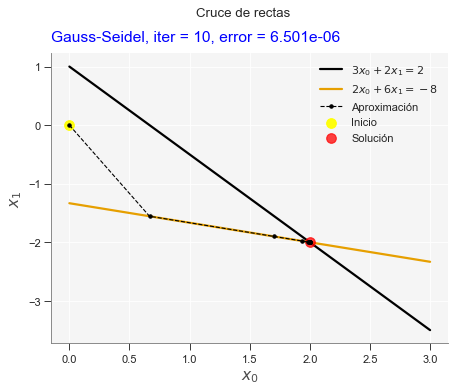

In [16]:
grafica(x, y0, y1, xini, solucion, 'Gauss-Seidel, iter = {}, error = {:4.3e}'.format(it,e))

# Ejercicio 3

Responde las siguientes preguntas:

    ¿Si tuvieras que elegir alguno de los 2 métodos vistos previamente para aproximar la solución de un sistema de ecuaciones lineales, cuál de los 2 usarías y por qué?.
    
    Ya que viste el desempeño de ambos métodos, ¿cuál de ellos se aproxima a la solución más rápido?.

    ¿Por qué creés que este método se aproxime más rápido?.

## Referencias
Para profundizar en los temas tratados en el presente documento se pueden consultar las siguientes fuentes:

* https://www.mty.itesm.mx/dmti/materias/ma2008/lecturas/ma2008-09a.pdf
* http://matematicas.unex.es/~trinidad/MM/tema2.pdf